In [3]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import random
from matplotlib import pyplot as plt

In [4]:
with open('train_set_driveless.pickle', 'rb') as f:
    X_train = pickle.load(f)
with open('labels_driveless.pickle', 'rb') as f:
    y_train = pickle.load(f)

X_train = np.asarray(X_train) 
y_train = np.asarray(y_train) 
    
print('X_train:', X_train)
print('y_train:', y_train)
print('shape of X_train:', X_train.shape)
print('shape of y_train:', y_train.shape)

X_train: [[[3.92156863e-03 7.84313725e-03 1.17647059e-02 ... 8.21248499e-01
   8.36734694e-01 9.09803922e-01]
  [0.00000000e+00 7.84313725e-03 1.17647059e-02 ... 8.86274510e-01
   9.09803922e-01 9.40536214e-01]
  [8.00320128e-05 8.72348940e-03 7.38615446e-01 ... 8.57903161e-01
   9.68627451e-01 9.20208083e-01]
  ...
  [1.56862745e-02 2.26890756e-02 3.24929972e-02 ... 2.20888355e-01
   3.69267707e-01 7.88235294e-01]
  [1.56862745e-02 2.74509804e-02 3.78151261e-02 ... 2.15686275e-01
   2.61984794e-01 7.88235294e-01]
  [1.56862745e-02 1.96078431e-02 3.10124050e-02 ... 1.52140856e-01
   2.17246899e-01 7.67867147e-01]]

 [[2.58823529e-01 2.95798319e-01 3.15846339e-01 ... 4.51780712e-02
   1.96078431e-02 2.07282913e-02]
  [2.62464986e-01 3.09243697e-01 3.72549020e-01 ... 5.49019608e-02
   3.52941176e-02 3.52941176e-02]
  [2.70428171e-01 3.13445378e-01 4.07843137e-01 ... 4.78991597e-02
   5.49019608e-02 3.52941176e-02]
  ...
  [2.70588235e-01 3.49579832e-01 4.39215686e-01 ... 8.57022809e-01
 

In [5]:
# splitting train_set and val_set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('shape of X_train:', X_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of X_val:', X_val.shape)
print('shape of y_val:', y_val.shape)

shape of X_train: (1200, 28, 28)
shape of y_train: (1200,)
shape of X_val: (300, 28, 28)
shape of y_val: (300,)


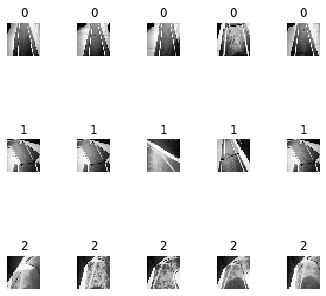

In [6]:
num_of_samples = []
cols = 5
num_classes = 3
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,5))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        samples = X_train[y_train == j]
        axs[j][i].imshow(samples[random.randint(0, (len(samples)-1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        axs[j][i].set_title(str(j))
        if i == 0:
            num_of_samples.append(len(samples))

[408, 394, 398]


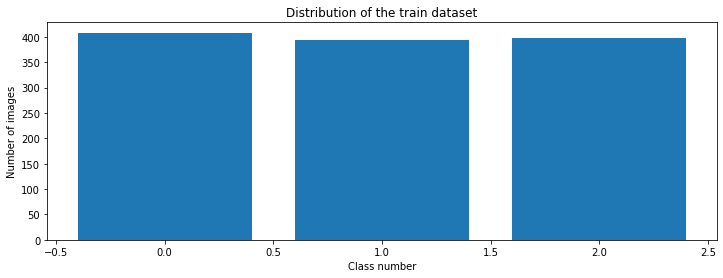

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [8]:
# adding the depth
X_train = X_train.reshape(1200, 28, 28, 1)
X_val = X_val.reshape(300, 28, 28, 1)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [10]:
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

print(y_val)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [11]:
def leNet_model():
    model = Sequential()
    
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(15, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation= 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [12]:
model = leNet_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________

In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Instructions for updating:
Use tf.cast instead.
Train on 1200 samples, validate on 300 samples
Epoch 1/20
1200/1200 [==============================] - 6s 5ms/step - loss: 1.6070 - acc: 0.3833 - val_loss: 1.0791 - val_acc: 0.5100
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 1.0459 - acc: 0.5467 - val_loss: 0.9697 - val_acc: 0.6700
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.9066 - acc: 0.6675 - val_loss: 0.7192 - val_acc: 0.8733
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6610 - acc: 0.8242 - val_loss: 0.3785 - val_acc: 0.8900
Epoch 5/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.4516 - acc: 0.8392 - val_loss: 0.3953 - val_acc: 0.8733
Epoch 6/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3785 - acc: 0.8650 - val_loss: 0.2915 - val_acc: 0.9100
Epoch 7/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2418 - acc: 0.9150 - va

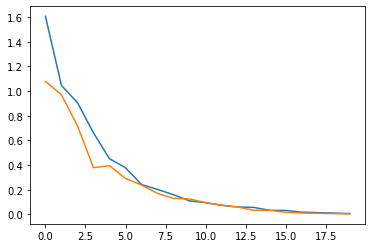

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

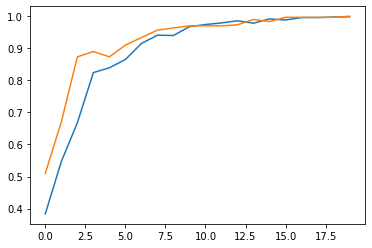

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [16]:
model.save('driveless_model.h5')